<a href="https://colab.research.google.com/github/SantiagoGomezfpv/hyperparameter/blob/main/Clasificadores_Optuna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Técnicas tradicionales clasificadores**

Este notebook de Colab está diseñado para entrenar y optimizar varios clasificadores tradicionales, como Random Forest, K-Neighbors, Support Vector Machines (SVM), y XGBoost, utilizando diferentes conjuntos de datos generados (moons, circles, y classification). Usaremos la biblioteca Optuna para realizar la optimización de hiperparámetros y encontrar la mejor configuración para cada modelo. Los resultados incluirán las fronteras de decisión de los clasificadores optimizados y su rendimiento en términos de precisión.

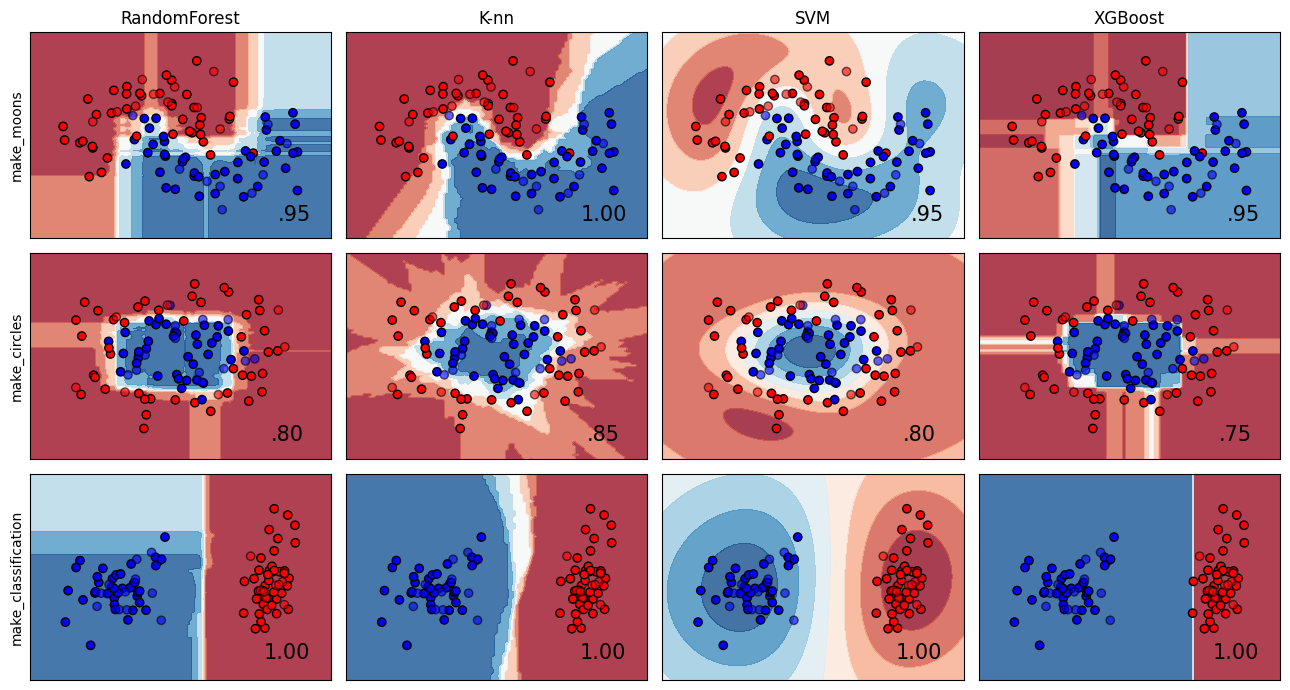

## Primero, realizamos las instalaciones necesarias:


En esta sección, instalamos las librerías necesarias para realizar la optimización y la clasificación de datos. Optuna es una biblioteca utilizada para la optimización de hiperparámetros y scikit-learn es una biblioteca popular para machine learning. Además, se usa xgboost para un modelo específico y matplotlib y seaborn para visualizar resultados.

In [2]:
!pip install optuna scikit-learn xgboost matplotlib seaborn

## Segundo, importamos las bibliotecas necesarias:

Aquí, importamos las funciones necesarias de scikit-learn para generar diferentes conjuntos de datos de ejemplo y para dividir estos datos en entrenamiento y prueba. La función train_test_split nos permite hacer esta división.

La siguiente función (generate_and_split_data) es para generar datos y dividirlos en dos partes: entrenamiento (para que el modelo aprenda) y prueba (para validar el modelo). Usamos diferentes generadores de datos para crear ejemplos de clasificación.

Por último, generamos tres conjuntos de datos distintos (make_moons, make_circles, make_classification). Cada uno tiene una forma diferente, lo que nos permitirá probar nuestros clasificadores en diferentes tipos de datos.

In [3]:
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.model_selection import train_test_split

# Función para generar y dividir datos
def generate_and_split_data(generator, test_size=0.2, random_state=42):
    X, y = generator
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

# Generar conjuntos de datos
datasets = {
    'make_moons': make_moons(noise=0.3, random_state=0),
    'make_circles': make_circles(noise=0.2, factor=0.5, random_state=1),
    'make_classification': make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1)
}

## **Random Forest + Optuna**

En esta sección, comenzamos con el uso de RandomForestClassifier y utilizamos Optuna para optimizar los hiperparámetros del modelo. Se define una función objetivo que será utilizada por Optuna para buscar los mejores hiperparámetros del modelo Random Forest.


* **n_estimators**: Número de árboles en el bosque. Se explora entre 10 y 200.
* **max_depth**: Profundidad máxima de los árboles. Rango entre 2 y 32.
* **min_samples_split**: Mínimo número de muestras necesarias para dividir un nodo. Rango entre 2 y 16.


Optuna realiza un estudio para encontrar los mejores parámetros para el modelo Random Forest, ajustando el modelo varias veces (50 pruebas). Esto se realiza para cada conjunto de datos y se imprimen los mejores parámetros obtenidos.



In [4]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Definir función objetivo para Optuna
def objective_rf(trial):
    n_estimators = trial.suggest_int('n_estimators', 10, 200)
    max_depth = trial.suggest_int('max_depth', 2, 32)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 16)

    clf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        random_state=42
    )

    scores = cross_val_score(clf, X_train, y_train, cv=3)
    return scores.mean()

# Crear y optimizar estudio con Optuna para cada conjunto de datos
best_params_rf = {}
for ds_name, (X, y) in datasets.items():
    X_train, X_test, y_train, y_test = generate_and_split_data((X, y))
    study_rf = optuna.create_study(direction='maximize')
    study_rf.optimize(objective_rf, n_trials=50)
    best_params_rf[ds_name] = study_rf.best_params
    print(f'Best parameters for Random Forest on {ds_name}: {study_rf.best_params}')

[I 2024-10-07 21:05:43,254] A new study created in memory with name: no-name-0d535ff4-255e-484c-8614-3723d43bcc36
[I 2024-10-07 21:05:44,694] Trial 0 finished with value: 0.9620132953466287 and parameters: {'n_estimators': 132, 'max_depth': 14, 'min_samples_split': 4}. Best is trial 0 with value: 0.9620132953466287.
[I 2024-10-07 21:05:46,108] Trial 1 finished with value: 0.899335232668566 and parameters: {'n_estimators': 168, 'max_depth': 22, 'min_samples_split': 10}. Best is trial 0 with value: 0.9620132953466287.
[I 2024-10-07 21:05:46,944] Trial 2 finished with value: 0.899335232668566 and parameters: {'n_estimators': 90, 'max_depth': 12, 'min_samples_split': 12}. Best is trial 0 with value: 0.9620132953466287.
[I 2024-10-07 21:05:48,091] Trial 3 finished with value: 0.899335232668566 and parameters: {'n_estimators': 65, 'max_depth': 4, 'min_samples_split': 11}. Best is trial 0 with value: 0.9620132953466287.
[I 2024-10-07 21:05:48,865] Trial 4 finished with value: 0.89933523266856

Best parameters for Random Forest on make_moons: {'n_estimators': 132, 'max_depth': 14, 'min_samples_split': 4}


[I 2024-10-07 21:06:21,618] Trial 0 finished with value: 0.8504273504273504 and parameters: {'n_estimators': 150, 'max_depth': 3, 'min_samples_split': 14}. Best is trial 0 with value: 0.8504273504273504.
[I 2024-10-07 21:06:22,341] Trial 1 finished with value: 0.8504273504273504 and parameters: {'n_estimators': 190, 'max_depth': 32, 'min_samples_split': 7}. Best is trial 0 with value: 0.8504273504273504.
[I 2024-10-07 21:06:22,852] Trial 2 finished with value: 0.8627730294396961 and parameters: {'n_estimators': 133, 'max_depth': 7, 'min_samples_split': 14}. Best is trial 2 with value: 0.8627730294396961.
[I 2024-10-07 21:06:23,359] Trial 3 finished with value: 0.8627730294396961 and parameters: {'n_estimators': 131, 'max_depth': 15, 'min_samples_split': 11}. Best is trial 2 with value: 0.8627730294396961.
[I 2024-10-07 21:06:24,042] Trial 4 finished with value: 0.8504273504273504 and parameters: {'n_estimators': 179, 'max_depth': 21, 'min_samples_split': 5}. Best is trial 2 with value:

Best parameters for Random Forest on make_circles: {'n_estimators': 120, 'max_depth': 19, 'min_samples_split': 4}


[I 2024-10-07 21:06:46,312] Trial 0 finished with value: 1.0 and parameters: {'n_estimators': 173, 'max_depth': 7, 'min_samples_split': 2}. Best is trial 0 with value: 1.0.
[I 2024-10-07 21:06:47,004] Trial 1 finished with value: 1.0 and parameters: {'n_estimators': 187, 'max_depth': 9, 'min_samples_split': 13}. Best is trial 0 with value: 1.0.
[I 2024-10-07 21:06:47,360] Trial 2 finished with value: 1.0 and parameters: {'n_estimators': 93, 'max_depth': 15, 'min_samples_split': 13}. Best is trial 0 with value: 1.0.
[I 2024-10-07 21:06:47,872] Trial 3 finished with value: 1.0 and parameters: {'n_estimators': 137, 'max_depth': 19, 'min_samples_split': 14}. Best is trial 0 with value: 1.0.
[I 2024-10-07 21:06:48,396] Trial 4 finished with value: 1.0 and parameters: {'n_estimators': 134, 'max_depth': 21, 'min_samples_split': 11}. Best is trial 0 with value: 1.0.
[I 2024-10-07 21:06:48,787] Trial 5 finished with value: 1.0 and parameters: {'n_estimators': 106, 'max_depth': 10, 'min_samples_

Best parameters for Random Forest on make_classification: {'n_estimators': 173, 'max_depth': 7, 'min_samples_split': 2}


## **K-nn + Optuna**

A continuación, se hace lo mismo para un clasificador de K-vecinos más cercanos (K-nearest neighbors). Usamos Optuna para optimizar el parámetro n_neighbors, que determina cuántos vecinos se usarán para clasificar un nuevo punto de datos.

* **n_neighbors**: Número de vecinos a considerar. Se ajusta entre 1 y 20.

In [5]:
from sklearn.neighbors import KNeighborsClassifier

# Definir función objetivo para Optuna
def objective_knn(trial):
    n_neighbors = trial.suggest_int('n_neighbors', 1, 20)

    clf = KNeighborsClassifier(n_neighbors=n_neighbors)

    scores = cross_val_score(clf, X_train, y_train, cv=3)
    return scores.mean()

# Crear y optimizar estudio con Optuna para cada conjunto de datos
best_params_knn = {}
for ds_name, (X, y) in datasets.items():
    X_train, X_test, y_train, y_test = generate_and_split_data((X, y))
    study_knn = optuna.create_study(direction='maximize')
    study_knn.optimize(objective_knn, n_trials=50)
    best_params_knn[ds_name] = study_knn.best_params
    print(f'Best parameters for K-Neighbors on {ds_name}: {study_knn.best_params}')

[I 2024-10-07 21:07:13,720] A new study created in memory with name: no-name-9736a201-d47c-4f40-8be8-62d52d25c329
[I 2024-10-07 21:07:13,740] Trial 0 finished with value: 0.9245014245014245 and parameters: {'n_neighbors': 9}. Best is trial 0 with value: 0.9245014245014245.
[I 2024-10-07 21:07:13,754] Trial 1 finished with value: 0.9116809116809117 and parameters: {'n_neighbors': 6}. Best is trial 0 with value: 0.9245014245014245.
[I 2024-10-07 21:07:13,770] Trial 2 finished with value: 0.8499525166191834 and parameters: {'n_neighbors': 20}. Best is trial 0 with value: 0.9245014245014245.
[I 2024-10-07 21:07:13,787] Trial 3 finished with value: 0.8746438746438746 and parameters: {'n_neighbors': 2}. Best is trial 0 with value: 0.9245014245014245.
[I 2024-10-07 21:07:13,802] Trial 4 finished with value: 0.9121557454890787 and parameters: {'n_neighbors': 1}. Best is trial 0 with value: 0.9245014245014245.
[I 2024-10-07 21:07:13,818] Trial 5 finished with value: 0.8499525166191834 and param

Best parameters for K-Neighbors on make_moons: {'n_neighbors': 5}


[I 2024-10-07 21:07:14,970] Trial 12 finished with value: 0.8622981956315289 and parameters: {'n_neighbors': 9}. Best is trial 8 with value: 0.8874643874643874.
[I 2024-10-07 21:07:14,994] Trial 13 finished with value: 0.8133903133903133 and parameters: {'n_neighbors': 11}. Best is trial 8 with value: 0.8874643874643874.
[I 2024-10-07 21:07:15,020] Trial 14 finished with value: 0.8613485280151947 and parameters: {'n_neighbors': 5}. Best is trial 8 with value: 0.8874643874643874.
[I 2024-10-07 21:07:15,056] Trial 15 finished with value: 0.8874643874643874 and parameters: {'n_neighbors': 10}. Best is trial 8 with value: 0.8874643874643874.
[I 2024-10-07 21:07:15,081] Trial 16 finished with value: 0.7492877492877493 and parameters: {'n_neighbors': 16}. Best is trial 8 with value: 0.8874643874643874.
[I 2024-10-07 21:07:15,107] Trial 17 finished with value: 0.8133903133903133 and parameters: {'n_neighbors': 11}. Best is trial 8 with value: 0.8874643874643874.
[I 2024-10-07 21:07:15,134] Tr

Best parameters for K-Neighbors on make_circles: {'n_neighbors': 10}


[I 2024-10-07 21:07:16,025] Trial 11 finished with value: 1.0 and parameters: {'n_neighbors': 11}. Best is trial 0 with value: 1.0.
[I 2024-10-07 21:07:16,052] Trial 12 finished with value: 1.0 and parameters: {'n_neighbors': 11}. Best is trial 0 with value: 1.0.
[I 2024-10-07 21:07:16,088] Trial 13 finished with value: 1.0 and parameters: {'n_neighbors': 20}. Best is trial 0 with value: 1.0.
[I 2024-10-07 21:07:16,114] Trial 14 finished with value: 1.0 and parameters: {'n_neighbors': 8}. Best is trial 0 with value: 1.0.
[I 2024-10-07 21:07:16,145] Trial 15 finished with value: 1.0 and parameters: {'n_neighbors': 13}. Best is trial 0 with value: 1.0.
[I 2024-10-07 21:07:16,172] Trial 16 finished with value: 1.0 and parameters: {'n_neighbors': 4}. Best is trial 0 with value: 1.0.
[I 2024-10-07 21:07:16,195] Trial 17 finished with value: 1.0 and parameters: {'n_neighbors': 19}. Best is trial 0 with value: 1.0.
[I 2024-10-07 21:07:16,214] Trial 18 finished with value: 1.0 and parameters: 

Best parameters for K-Neighbors on make_classification: {'n_neighbors': 9}


## **SVM + Optuna**

(Support Vector Machines - Máquinas de vectores de soporte)

De forma similar, se optimizan los parámetros del modelo de máquinas de soporte vectorial (SVM). Aquí, Optuna ajusta el parámetro C, que controla la regularización del modelo.

* **C**: Parámetro de regularización que controla el margen de separación entre clases. Se explora en un rango logarítmico entre 1e-6 y 1e+6.


In [6]:
from sklearn.svm import SVC

# Definir función objetivo para Optuna
def objective_svc(trial):
    C = trial.suggest_float('C', 1e-6, 1e+6, log=True)
    clf = SVC(C=C, random_state=42)
    scores = cross_val_score(clf, X_train, y_train, cv=3)
    return scores.mean()

# Crear y optimizar estudio con Optuna para cada conjunto de datos
best_params_svc = {}
for ds_name, (X, y) in datasets.items():
    X_train, X_test, y_train, y_test = generate_and_split_data((X, y))
    study_svc = optuna.create_study(direction='maximize')
    study_svc.optimize(objective_svc, n_trials=50)
    best_params_svc[ds_name] = study_svc.best_params
    print(f'Best parameters for SVC on {ds_name}: {study_svc.best_params}')

[I 2024-10-07 21:07:16,902] A new study created in memory with name: no-name-d8cbe592-ea67-4122-bcc3-3259376b55e6
[I 2024-10-07 21:07:16,915] Trial 0 finished with value: 0.9126305792972461 and parameters: {'C': 0.3865722052970934}. Best is trial 0 with value: 0.9126305792972461.
[I 2024-10-07 21:07:16,926] Trial 1 finished with value: 0.8755935422602089 and parameters: {'C': 1394.302812541164}. Best is trial 0 with value: 0.9126305792972461.
[I 2024-10-07 21:07:16,939] Trial 2 finished with value: 0.825735992402659 and parameters: {'C': 453250.70652627}. Best is trial 0 with value: 0.9126305792972461.
[I 2024-10-07 21:07:16,950] Trial 3 finished with value: 0.9121557454890787 and parameters: {'C': 0.8286031458554748}. Best is trial 0 with value: 0.9126305792972461.
[I 2024-10-07 21:07:16,961] Trial 4 finished with value: 0.8380816714150047 and parameters: {'C': 5004.489427731676}. Best is trial 0 with value: 0.9126305792972461.
[I 2024-10-07 21:07:16,975] Trial 5 finished with value: 

Best parameters for SVC on make_moons: {'C': 48.64436025497048}


[I 2024-10-07 21:07:18,092] Trial 11 finished with value: 0.8874643874643874 and parameters: {'C': 30.51883319026667}. Best is trial 11 with value: 0.8874643874643874.
[I 2024-10-07 21:07:18,117] Trial 12 finished with value: 0.8874643874643874 and parameters: {'C': 15.602633364739818}. Best is trial 11 with value: 0.8874643874643874.
[I 2024-10-07 21:07:18,145] Trial 13 finished with value: 0.899335232668566 and parameters: {'C': 3.119286805581025}. Best is trial 13 with value: 0.899335232668566.
[I 2024-10-07 21:07:18,176] Trial 14 finished with value: 0.9126305792972461 and parameters: {'C': 0.5847549956203371}. Best is trial 14 with value: 0.9126305792972461.
[I 2024-10-07 21:07:18,218] Trial 15 finished with value: 0.9121557454890787 and parameters: {'C': 0.33649739164524856}. Best is trial 14 with value: 0.9126305792972461.
[I 2024-10-07 21:07:18,243] Trial 16 finished with value: 0.7255460588793922 and parameters: {'C': 0.12581514478381756}. Best is trial 14 with value: 0.912630

Best parameters for SVC on make_circles: {'C': 0.7862337568776651}


[I 2024-10-07 21:07:19,192] Trial 11 finished with value: 1.0 and parameters: {'C': 151.53253643928787}. Best is trial 0 with value: 1.0.
[I 2024-10-07 21:07:19,216] Trial 12 finished with value: 1.0 and parameters: {'C': 320.6938850593265}. Best is trial 0 with value: 1.0.
[I 2024-10-07 21:07:19,243] Trial 13 finished with value: 0.5123456790123456 and parameters: {'C': 0.01323919159722905}. Best is trial 0 with value: 1.0.
[I 2024-10-07 21:07:19,269] Trial 14 finished with value: 1.0 and parameters: {'C': 8.444096963002439}. Best is trial 0 with value: 1.0.
[I 2024-10-07 21:07:19,292] Trial 15 finished with value: 0.7245963912630579 and parameters: {'C': 0.024724454763626568}. Best is trial 0 with value: 1.0.
[I 2024-10-07 21:07:19,314] Trial 16 finished with value: 1.0 and parameters: {'C': 2769.6554902072867}. Best is trial 0 with value: 1.0.
[I 2024-10-07 21:07:19,335] Trial 17 finished with value: 0.5123456790123456 and parameters: {'C': 4.155588367932283e-06}. Best is trial 0 wi

Best parameters for SVC on make_classification: {'C': 0.07347737088639532}


## **XGBoost + Optuna**

En esta última sección de clasificación, utilizamos el modelo XGBoost. Optuna ajusta los hiperparámetros n_estimators, max_depth y learning_rate.

* **n_estimators**: Número de árboles de refuerzo. Se ajusta entre 10 y 200.
* **max_depth**: Profundidad máxima de los árboles. Rango entre 2 y 32.
* **learning_rate**: Tasa de aprendizaje para la actualización del modelo. Se optimiza entre 0.01 y 0.2.

In [7]:
import xgboost as xgb

# Definir función objetivo para Optuna
def objective_xgb(trial):
    n_estimators = trial.suggest_int('n_estimators', 10, 200)
    max_depth = trial.suggest_int('max_depth', 2, 32)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.2)

    clf = xgb.XGBClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        random_state=42
    )

    scores = cross_val_score(clf, X_train, y_train, cv=3)
    return scores.mean()

# Crear y optimizar estudio con Optuna para cada conjunto de datos
best_params_xgb = {}
for ds_name, (X, y) in datasets.items():
    X_train, X_test, y_train, y_test = generate_and_split_data((X, y))
    study_xgb = optuna.create_study(direction='maximize')
    study_xgb.optimize(objective_xgb, n_trials=50)
    best_params_xgb[ds_name] = study_xgb.best_params
    print(f'Best parameters for XGBoost on {ds_name}: {study_xgb.best_params}')

[I 2024-10-07 21:07:20,268] A new study created in memory with name: no-name-99fd064d-ff53-44a2-9035-49ccac22e2dd
[I 2024-10-07 21:07:20,387] Trial 0 finished with value: 0.8138651471984805 and parameters: {'n_estimators': 16, 'max_depth': 26, 'learning_rate': 0.07031473596149297}. Best is trial 0 with value: 0.8138651471984805.
[I 2024-10-07 21:07:20,435] Trial 1 finished with value: 0.8751187084520419 and parameters: {'n_estimators': 52, 'max_depth': 7, 'learning_rate': 0.1418283717227429}. Best is trial 1 with value: 0.8751187084520419.
[I 2024-10-07 21:07:20,511] Trial 2 finished with value: 0.8622981956315289 and parameters: {'n_estimators': 127, 'max_depth': 9, 'learning_rate': 0.10220116895513585}. Best is trial 1 with value: 0.8751187084520419.
[I 2024-10-07 21:07:20,595] Trial 3 finished with value: 0.8622981956315289 and parameters: {'n_estimators': 188, 'max_depth': 26, 'learning_rate': 0.19088068605547623}. Best is trial 1 with value: 0.8751187084520419.
[I 2024-10-07 21:07

Best parameters for XGBoost on make_moons: {'n_estimators': 26, 'max_depth': 25, 'learning_rate': 0.0756306844821468}


[I 2024-10-07 21:07:24,134] Trial 3 finished with value: 0.825735992402659 and parameters: {'n_estimators': 15, 'max_depth': 27, 'learning_rate': 0.08361778829356181}. Best is trial 0 with value: 0.8380816714150047.
[I 2024-10-07 21:07:24,177] Trial 4 finished with value: 0.8133903133903133 and parameters: {'n_estimators': 53, 'max_depth': 21, 'learning_rate': 0.1881834178963508}. Best is trial 0 with value: 0.8380816714150047.
[I 2024-10-07 21:07:24,209] Trial 5 finished with value: 0.8133903133903133 and parameters: {'n_estimators': 18, 'max_depth': 23, 'learning_rate': 0.11806275354287701}. Best is trial 0 with value: 0.8380816714150047.
[I 2024-10-07 21:07:24,256] Trial 6 finished with value: 0.8133903133903133 and parameters: {'n_estimators': 39, 'max_depth': 22, 'learning_rate': 0.04512275815698551}. Best is trial 0 with value: 0.8380816714150047.
[I 2024-10-07 21:07:24,320] Trial 7 finished with value: 0.8133903133903133 and parameters: {'n_estimators': 115, 'max_depth': 4, 'lea

Best parameters for XGBoost on make_circles: {'n_estimators': 130, 'max_depth': 32, 'learning_rate': 0.1506951928894481}


[I 2024-10-07 21:07:29,038] Trial 3 finished with value: 0.9876543209876543 and parameters: {'n_estimators': 109, 'max_depth': 23, 'learning_rate': 0.09265322079117987}. Best is trial 0 with value: 0.9876543209876543.
[I 2024-10-07 21:07:29,084] Trial 4 finished with value: 0.9876543209876543 and parameters: {'n_estimators': 97, 'max_depth': 24, 'learning_rate': 0.17157053771233294}. Best is trial 0 with value: 0.9876543209876543.
[I 2024-10-07 21:07:29,143] Trial 5 finished with value: 0.9876543209876543 and parameters: {'n_estimators': 141, 'max_depth': 8, 'learning_rate': 0.19038226890533486}. Best is trial 0 with value: 0.9876543209876543.
[I 2024-10-07 21:07:29,176] Trial 6 finished with value: 0.9876543209876543 and parameters: {'n_estimators': 16, 'max_depth': 31, 'learning_rate': 0.14415684829955133}. Best is trial 0 with value: 0.9876543209876543.
[I 2024-10-07 21:07:29,232] Trial 7 finished with value: 0.9876543209876543 and parameters: {'n_estimators': 143, 'max_depth': 8, '

Best parameters for XGBoost on make_classification: {'n_estimators': 44, 'max_depth': 8, 'learning_rate': 0.1335204001744771}


# **Entrenar y Evaluar los Modelos con los Mejores Parámetros**

Finalmente, entrenamos y evaluamos los mejores modelos para cada conjunto de datos y cada algoritmo, y visualizamos las fronteras de decisión de los clasificadores entrenados en gráficos.

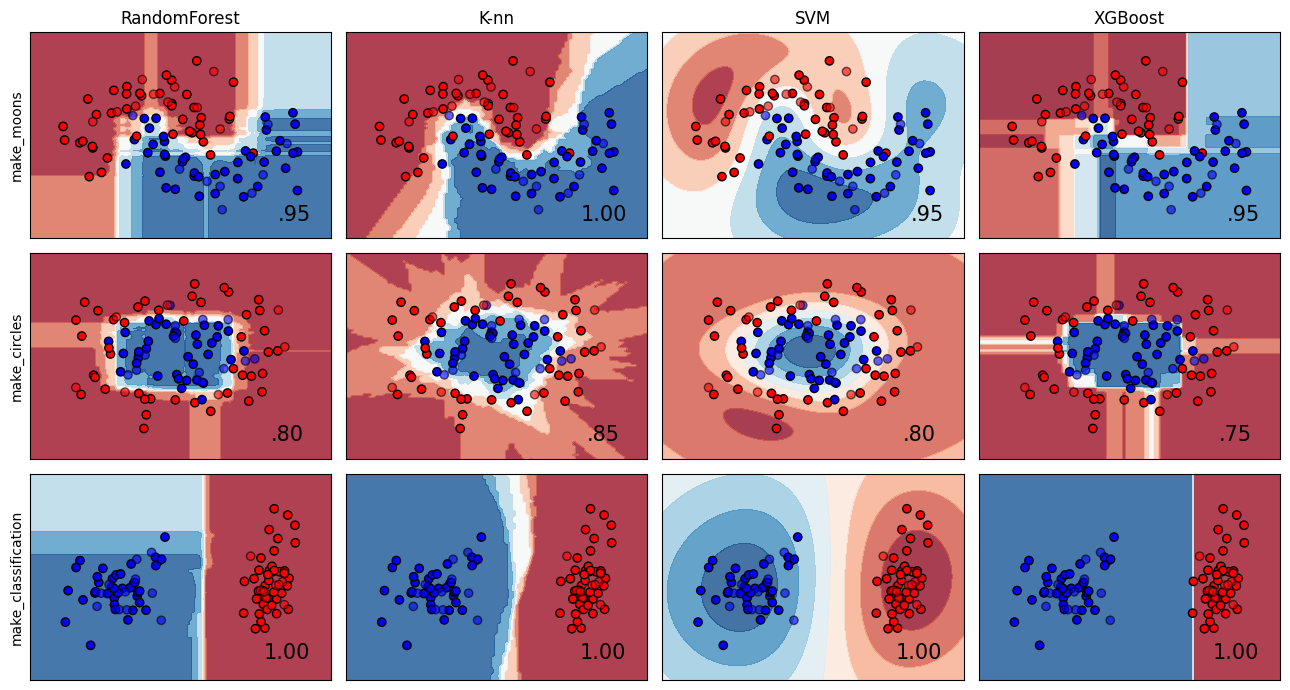

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay

# Entrenar y evaluar los mejores modelos
results = {}
for ds_name, (X, y) in datasets.items():
    X_train, X_test, y_train, y_test = generate_and_split_data((X, y))

    # Random Forest
    best_rf = RandomForestClassifier(**best_params_rf[ds_name], random_state=42)
    best_rf.fit(X_train, y_train)
    accuracy_rf = best_rf.score(X_test, y_test)
    results[(ds_name, 'RandomForest')] = (best_rf, accuracy_rf)

    # K-Neighbors
    best_knn = KNeighborsClassifier(**best_params_knn[ds_name])
    best_knn.fit(X_train, y_train)
    accuracy_knn = best_knn.score(X_test, y_test)
    results[(ds_name, 'K-nn')] = (best_knn, accuracy_knn)

    # SVC
    best_svc = SVC(**best_params_svc[ds_name], random_state=42)
    best_svc.fit(X_train, y_train)
    accuracy_svc = best_svc.score(X_test, y_test)
    results[(ds_name, 'SVM')] = (best_svc, accuracy_svc)

    # XGBoost
    best_xgb = xgb.XGBClassifier(**best_params_xgb[ds_name], random_state=42)
    best_xgb.fit(X_train, y_train)
    accuracy_xgb = best_xgb.score(X_test, y_test)
    results[(ds_name, 'XGBoost')] = (best_xgb, accuracy_xgb)

    # Visualizar resultados
fig, axs = plt.subplots(len(datasets), len(results) // len(datasets), figsize=(13, 7))
axs = axs.reshape(len(datasets), -1)  # Asegurar que axs sea un array 2D
for i, (ds_name, (X, y)) in enumerate(datasets.items()):
    X_train, X_test, y_train, y_test = generate_and_split_data((X, y))
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    for j, clf_name in enumerate(['RandomForest', 'K-nn', 'SVM', 'XGBoost']):
        ax = axs[i, j]
        cm = plt.cm.RdBu
        cm_bright = ListedColormap(["#FF0000", "#0000FF"])

        clf, accuracy = results[(ds_name, clf_name)]

        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        ax.scatter(
            X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if i == 0:
            ax.set_title(clf_name)
        if j == 0:
            ax.set_ylabel(ds_name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % accuracy).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )

plt.tight_layout()
fig.savefig('Clasificadores.png', bbox_inches='tight')
plt.show()